<a href="https://colab.research.google.com/github/Priyanka250807/intern_1_colab/blob/main/TASK_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Model Evaluation:
Accuracy: 0.8876479044564857

Classification Report:
           

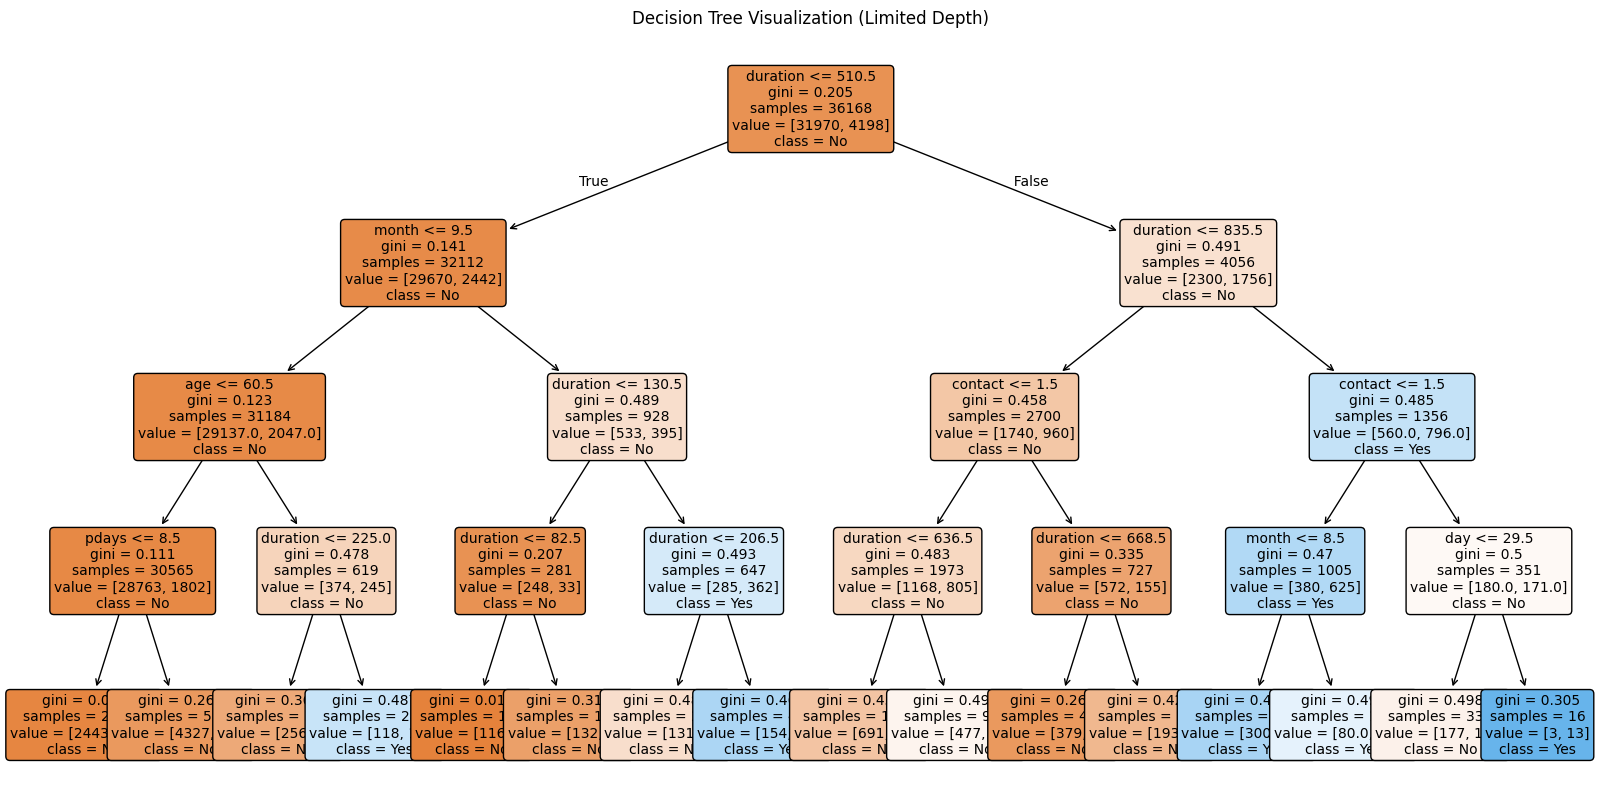

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/bank-full.csv'  # Update this to your file path if necessary
df = pd.read_csv(file_path, sep=';')  # Use the correct delimiter
print("Dataset loaded successfully!")
print(df.head())

# Step 2: Preprocess the dataset
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Split the data into features (X) and target (y)
target_column = "y"  # Target column
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier with controlled depth
model = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()
